Importación de Librerías

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn

Leer el DataSet desde un archivo .csv

IMPORTANTE: Cambios en los valores del DataSet en las variables formato string



Autism: Yes - 1 // No - 0



Gender: f - 1 // m - 0



Ethnicity:

'Middle eastern' - 1
'White European' - 2
'Hispanic'       - 3
'Black'          - 4
'Asian'          - 5
'South asian'    - 6
'Native Indian'  - 7
'Others'         - 8
'Latino'         - 9
'Mixed'          - 10
'Pacifica'       - 11


Family Member with ASD:

'Family Member'            - 0
'Health Care Professional' - 1
'Self'                     - 2

In [36]:
dataset = pd.read_csv("Toddler Autism dataset July 2018_Mod2.csv").drop(columns=["Case_No"])
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,0,2,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,0,3,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,1,2,0,1,0,1


Separación entre datos y etiquetas

In [37]:
dataset_data = dataset.iloc[:, :-1]
dataset_label = dataset.iloc[:, -1]

Partición de datos para entrenamiento y Test

In [38]:
dataset_train_data , dataset_test_data ,  dataset_train_label , dataset_test_label = train_test_split(dataset_data , dataset_label , test_size=0.2, random_state=42)


Creación del Modelo

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=17, activation='sigmoid',input_shape=(17, )))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

Compilación del modelo

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 17)                306       
                                                                 
 dense_13 (Dense)            (None, 10)                180       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 2)                 22        
                                                                 
Total params: 618 (2.41 KB)
Trainable params: 618 (2.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamiento del modelo

In [41]:
model.fit(dataset_train_data, dataset_train_label, epochs=20)

Epoch 1/20
27/27 [==============================] - 1s 2ms/step - loss: 0.6684 - sparse_categorical_accuracy: 0.5931
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.6198 - sparse_categorical_accuracy: 0.6916
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 0.6000 - sparse_categorical_accuracy: 0.6951
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.5857 - sparse_categorical_accuracy: 0.6963
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5636 - sparse_categorical_accuracy: 0.7023
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5190 - sparse_categorical_accuracy: 0.7046
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4499 - sparse_categorical_accuracy: 0.7888
Epoch 8/20
27/27 [==============================] - 0s 2ms/step - loss: 0.3675 - sparse_categorical_accuracy: 0.8719
Epoch 9/20
27/27 [==============================] - 0s 2ms/step 

Evaluación del modelo sobre la partición del test

In [42]:
Test_loss, Test_accuracy = model.evaluate(dataset_test_data, dataset_test_label)
dataset_test_predictions = np.argmax(model.predict(dataset_test_data), axis=-1)
print("Test accuracy: {}".format(Test_accuracy))

7/7 [==============================] - 0s 2ms/step
Test accuracy: 0.9620853066444397


Matriz de Confusión

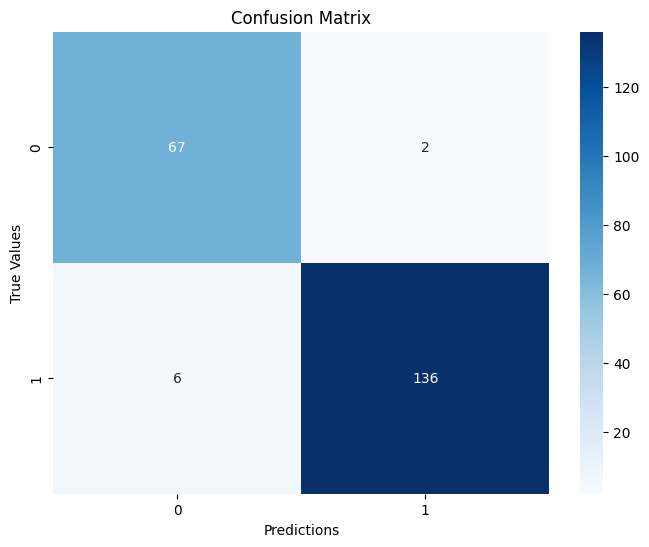

In [43]:
conf_matrx=metrics.confusion_matrix(dataset_test_label,dataset_test_predictions)
labels=np.unique(dataset_test_label)
plt.figure(figsize=(8,6))
seaborn.heatmap(conf_matrx,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()